In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf

# Import our custom modules
from src.data_loader import H5DataLoader
from src.logic_preprocessing import Logic_PhysicsPreprocessor
from src.visualization import PhysicsVisualizer
from src.model import build_model
from src.utils import ModelEvaluator

In [2]:
# Initialize the robust loader
loader = H5DataLoader()

# Update paths to use the NEW merged files
current_signal = 'data/signal.h5'      
current_bkg = 'data/background.h5'  

# Load Data Dict
# The loader handles the shapes/renaming automatically now
data_dict = loader.get_data(signal_path=current_signal, background_path=current_bkg)

# Verify
print(f"Data components loaded: {list(data_dict.keys())}")
if 'event' in data_dict:
    print(f"Total Events: {len(data_dict['event'])}")

Loading Signal: data/signal.h5
Loading Background: data/background.h5
Combining datasets...
Data loaded. Keys: ['event', 'met', 'ditau', 'jet', 'lepton']
Data components loaded: ['event', 'met', 'ditau', 'jet', 'lepton']
Total Events: 250000


In [3]:
# Initialize with the dictionary
preprocessor= Logic_PhysicsPreprocessor(data_dict) # Pass the dict here

# 1. Apply Event Topology & Kinematic Cuts
# 2. Flatten & Merge
processed_df = preprocessor.process_pipeline()

# Get training splits
(X_train, y_train), (X_val, y_val), (X_test, y_test) = preprocessor.get_train_test_data()

print(f"Final Training Set size: {X_train.shape}")
print(f"Test Set size: {X_test.shape}")

Events passing cuts: 110059
Processed Columns (36): ['event_index', 'averageInteractionsPerCrossing', 'signal', 'MetTST_met', 'MetTST_sumet', 'MetTrack_met', 'MetTrack_sumet', 'met_phi', 'num_jet', 'num_bjet', 'num_ditau', 'jet_pt_1', 'jet_pt_2', 'jet_eta_1', 'jet_eta_2', 'jet_phi_1', 'jet_phi_2', 'jet_jvt_1', 'jet_jvt_2', 'bjet_pt_1', 'bjet_eta_1', 'bjet_phi_1', 'bjet_jvt_1', 'lepton_pt_1', 'lepton_eta_1', 'lepton_phi_1', 'ditau_pt_1', 'ditau_eta_1', 'ditau_phi_1', 'ditau_bdt_1', 'ditau_subjet_lead_pt_1', 'ditau_subjet_lead_eta_1', 'ditau_subjet_lead_phi_1', 'ditau_subjet_subl_pt_1', 'ditau_subjet_subl_eta_1', 'ditau_subjet_subl_phi_1']
Final Feature Shape: (110059, 33)
Final Training Set size: (77041, 33)
Test Set size: (16509, 33)


Generating Physics Distributions...


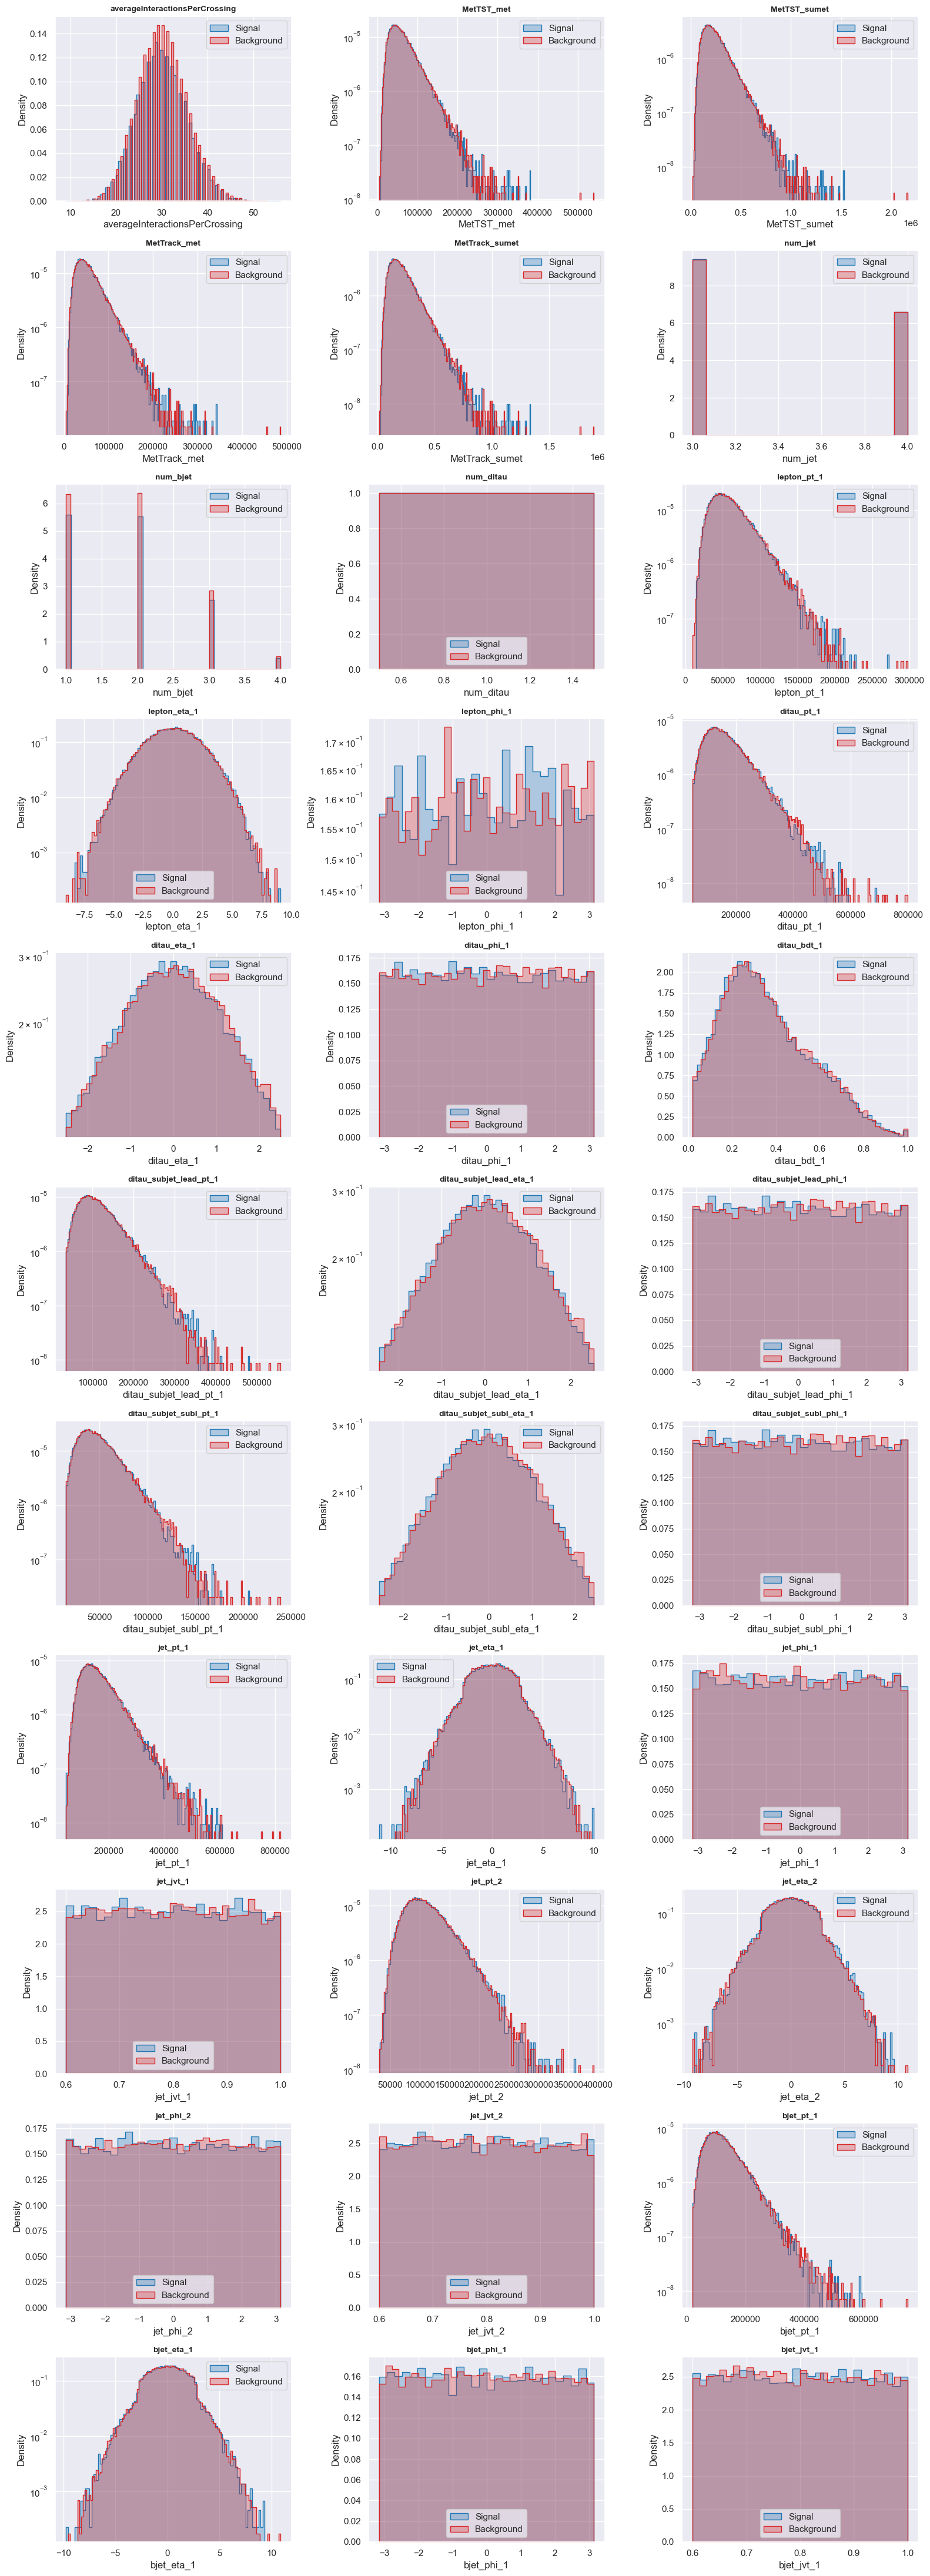

Generating Correlation Matrix...


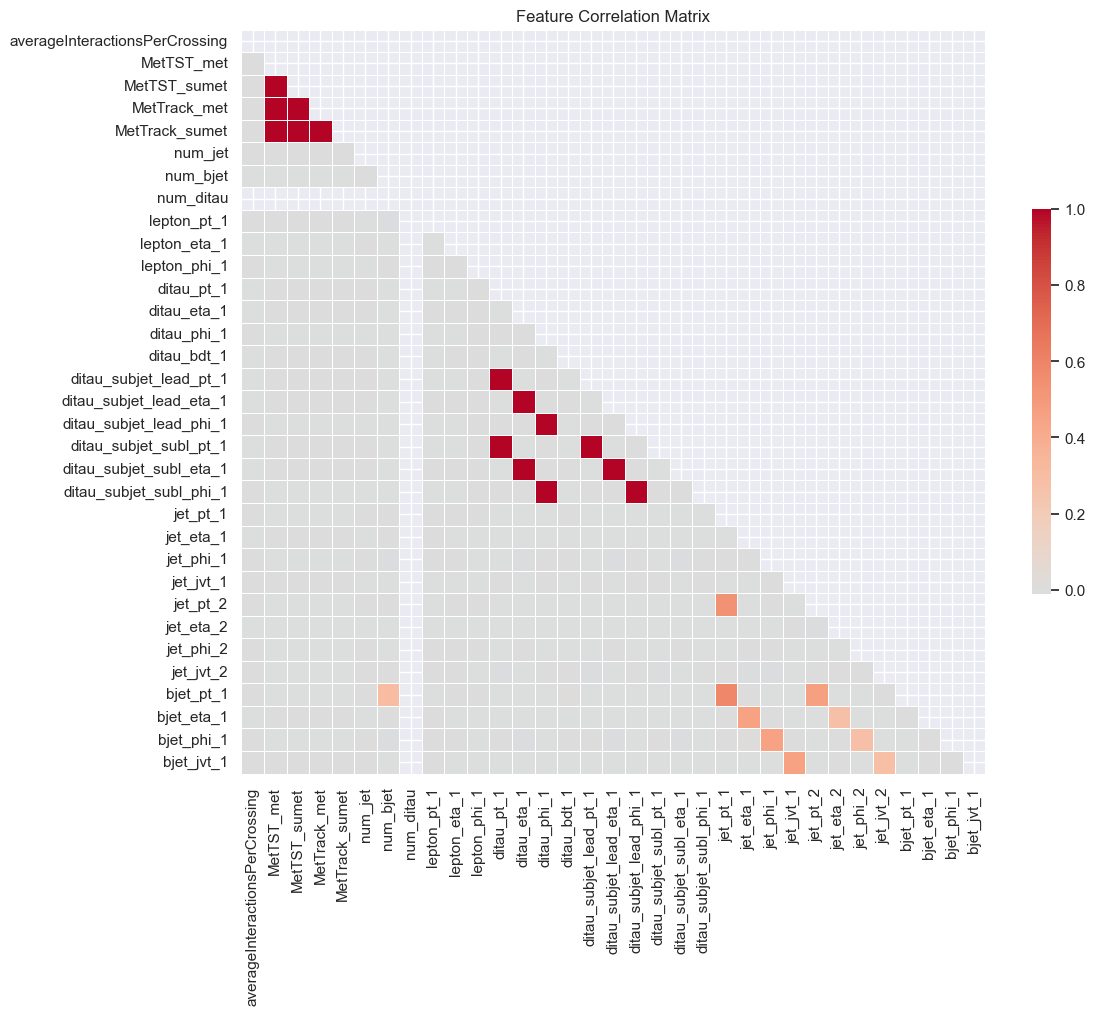

In [4]:
viz = PhysicsVisualizer()
feature_names = preprocessor.feature_columns # Get list of names
X_train_physics_units = preprocessor.scaler.inverse_transform(X_train)
print("Generating Physics Distributions...")
viz.plot_distributions(X_train_physics_units, y_train, feature_names)
print("Generating Correlation Matrix...")
viz.plot_correlations(X_train, feature_names)

In [5]:
# 1. Determine input dimension from your data
input_dim = X_train.shape[1]

# 2. Instantiate the model
model = build_model(input_dim)

model.build(input_shape=(None, input_dim))

model.summary()

Model: "DiTauClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 33)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ init_dense (Dense)              │ (None, 64)             │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ init_activation (PReLU)         │ (None, 64)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ init_dropout (Dropout)          │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dense_0 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_activation_0 (PReLU)     │ (None, 64)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dropout_0 (Dropout)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dense_1 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_activation_1 (PReLU)     │ (None, 64)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dropout_1 (Dropout)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dense_2 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_activation_2 (PReLU)     │ (None, 64)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dropout_2 (Dropout)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dense_3 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_activation_3 (PReLU)     │ (None, 64)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dropout_3 (Dropout)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dense_4 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_activation_4 (PReLU)     │ (None, 64)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dropout_4 (Dropout)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dense_5 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_activation_5 (PReLU)     │ (None, 64)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dropout_5 (Dropout)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,649 (108.00 KB)

 Trainable params: 27,649 (108.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from sklearn.utils import class_weight

# 1. Calculate Class Weights
# This balances the loss so the model treats both classes equally important
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(weights))
print(f"Computed Class Weights: {class_weight_dict}")

# 2. Train with Weights AND Smaller Batch Size
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint('models/best_ditau_model.keras', save_best_only=True)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=2048,           
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)
print("Training complete.")

Computed Class Weights: {0: np.float64(0.6935881738629407), 1: np.float64(1.7914011998325814)}
Epoch 1/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.6599 - loss: 0.6107 - val_accuracy: 0.8517 - val_loss: 0.3655
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8338 - loss: 0.3938 - val_accuracy: 0.8690 - val_loss: 0.3273
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8581 - loss: 0.3427 - val_accuracy: 0.8838 - val_loss: 0.2848
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8650 - loss: 0.3248 - val_accuracy: 0.8781 - val_loss: 0.2875
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8688 - loss: 0.3134 - val_accuracy: 0.8800 - val_loss: 0.2907
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8720 - loss: 0.3063 - val_accuracy: 0.8845 - val_loss: 0.2765
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8740 - loss: 0.3029 - val_accuracy: 0.8836 - val_loss: 0.2844
Epoch 8/25
38/38

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step
Training history saved to results\training_history.png


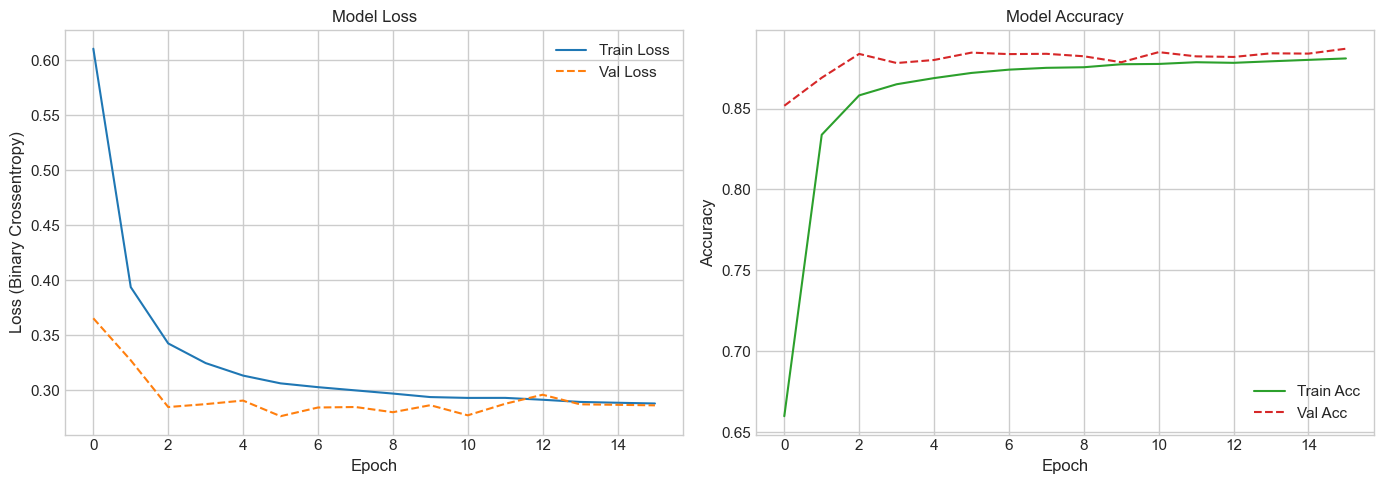

In [7]:
# Calculate predictions
y_pred = model.predict(X_test).ravel()

# Initialize our visualization toolkit
evaluator = ModelEvaluator(output_dir='results')

# 1. Plot Training History (Loss & Accuracy)
evaluator.plot_training_history(history)

ROC Curve saved to results\roc_curve.png


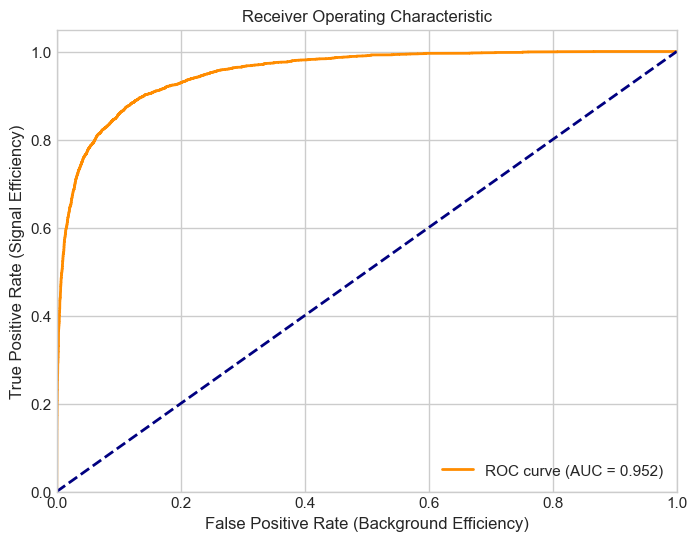

Final AUC Score: 0.9524


In [8]:
# 2. Plot ROC Curve (The most important metric for this paper)
auc_score = evaluator.plot_roc_curve(y_test, y_pred)

print(f"Final AUC Score: {auc_score:.4f}")

In [9]:
# 3. Confusion Matrix at threshold 0.5
evaluator.plot_confusion_matrix(y_test, y_pred, threshold=0.5)
evaluator.print_classification_report(y_test, y_pred)

Confusion Matrix saved to results\confusion_matrix.png

--- Classification Report ---
              precision    recall  f1-score   support

  Background       0.95      0.88      0.92     11998
      Signal       0.74      0.88      0.80      4511

    accuracy                           0.88     16509
   macro avg       0.84      0.88      0.86     16509
weighted avg       0.89      0.88      0.88     16509

